In [3]:
from IPython.display import display, Image, Audio

import cv2  # We're using OpenCV to read video, to install !pip install opencv-python
import base64
import time
from openai import OpenAI
import os
import requests
from dotenv import load_dotenv

load_dotenv('../.env')

True

In [6]:
%load_ext dotenv
%dotenv -o ../.env

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [4]:
OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")
client = OpenAI(api_key=OPENAI_API_KEY)

In [7]:
video = cv2.VideoCapture("../demo-videos/pacman-s.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

228 frames read.


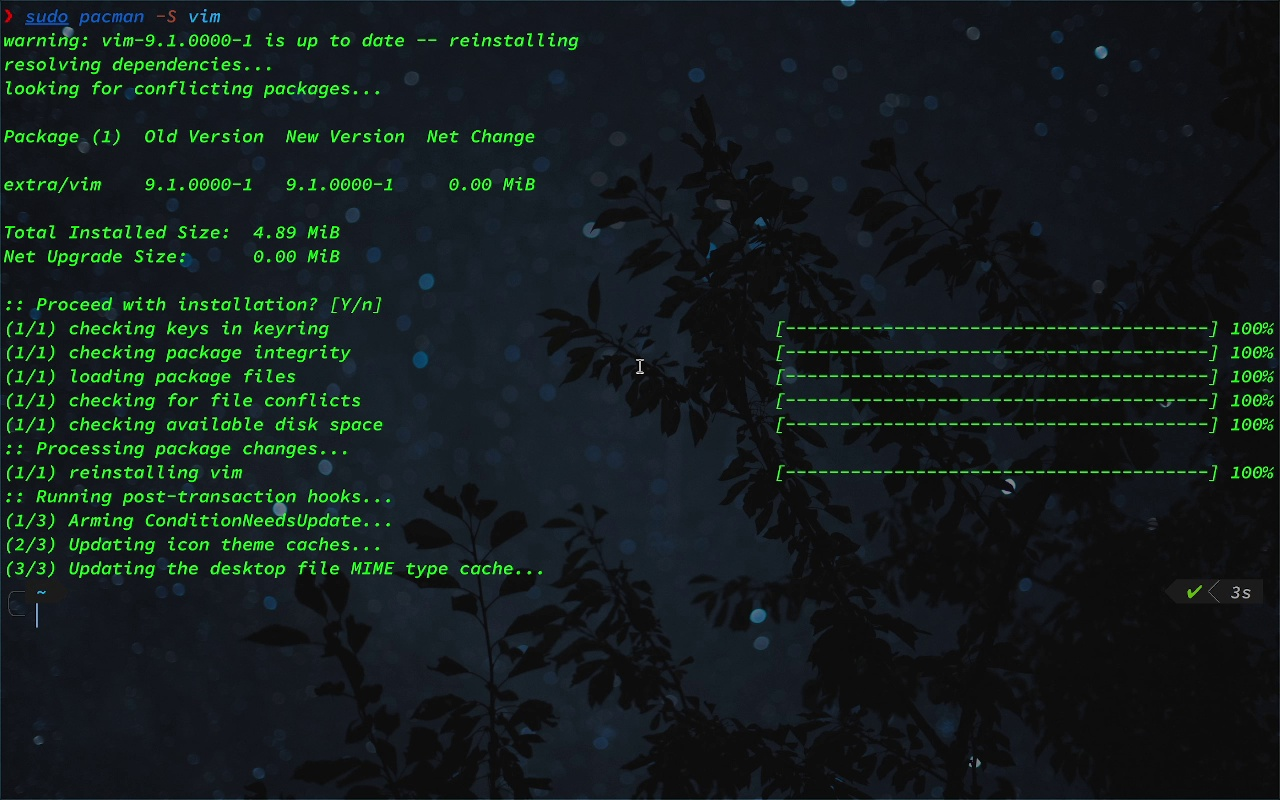

In [4]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

In [8]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames from a video that I want to upload.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::50]),
            "\n\nWhat package is installed in this video?"
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 200,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

The package being installed in the video is Vim. Vim is a highly configurable text editor that is an improved version of the vi editor distributed with most UNIX systems. The command used to install it is `sudo pacman -S vim`, which indicates that the operating system is likely to be Arch Linux or one of its derivatives, as `pacman` is the package manager used in these distributions.
